In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.regression import linear_model as sm
import sys, os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
cmap = cm.tab10
from data_io_ts import *
from stats import *
from powerlaw_fit import *
from modules_plotting import * # import setup for figure layout 
# edit modules_plotting.py to customize figures
from scipy import signal
from valanghe import *
import random
import matplotlib.cm as cm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
datapath= [r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_001.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_002.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_003.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_004.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_005.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_006.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_007.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_008.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_009.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_010.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_011.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_012.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_013.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_014.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_015.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_016.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_017.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_018.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_019.bin",
r"/home/benny/Desktop/altriDati/20181025_4x64/2s/ISI_2s_1st_sf976.5625_020.bin"]

# In each .bin file a 10 second long recording is present. I take into account all of 
# these recordings to study avalanche statistics

In [47]:
path = datapath[0]
width = 4    
heigth = 64   
n_frames_to_load = -1  # load all frames
raw = np.fromfile(path, dtype=np.double, count = n_frames_to_load)  
a = np.reshape(raw, (-1, width, heigth))
a1 = np.delete(a,(0,1,2,3,4,5,6,7,8), axis = 2)

[0.00286131 0.88681023]


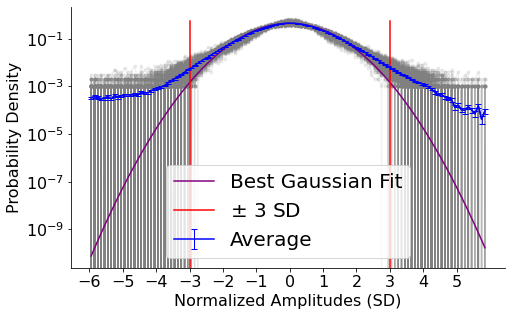

In [132]:
GaussianComparisonMean(a1,-6,6,3)

In [125]:
# First of all I upload the data and discretize them. The discretized data are
# stored in the array "data" (first dim: number of the recording repetitions)
# I also store the intervents in order to calculate an average inter event interval
# among all the repetitions.

# Execution time: about 2 minutes

# The recordings are divided in three intervals:
# from frame 147 to 2099 is the response to the first stimulus
# from frame 2100 to 4051 is the response to the second stimulus
# from frame 4052 to the end of the recording is the final part of resting state

interevents = [[] for i in range(3)] #one list for each of the three intervals
avinterval = [[] for i in range(3)]


data = np.zeros((20,9764,4,55), dtype = int) #array that will contain discretized data

for k in range(len(datapath)):
    path = datapath[k]
    width = 4    #columns
    heigth = 64   #rows

    n_words_to_load = -1  #load  all frames 


    raw = np.fromfile(path, dtype=np.double, count = n_words_to_load)  # count = -1 to load all data
    
    a = np.reshape(raw, (-1, width, heigth))
    a1 = np.delete(a,(0,1,2,3,4,5,6,7,8), axis = 2)
    
    #deleted the first 9 colums since they are outside barrel cortex

     
    # I discretized the data consideing the standard deviation in each of the regimes.
    # I here consider both positive and negative deflections. 
    
    data[k,147:2100] = threshold(a1[147:2100],np.mean(a1[147:2100],axis = 0),np.std(a1[147:2100],ddof = 1,axis = 0),3,"posneg", "option1")
                              
    data[k,2100:4052] = threshold(a1[2100:4052],np.mean(a1[2100:4052],axis = 0),np.std(a1[2100:4052],ddof = 1,axis = 0),3,"posneg", "option1")
                               
    data[k,4052:] = threshold(a1[4052:],np.mean(a1[4052:],axis = 0),np.std(a1[4052:],ddof = 1,axis = 0),3,"posneg", "option1")
    
  
    sample0 = data[k,147:2100] 
    sample1 = data[k,2100:4052] 
    sample2 = data[k,4052:] 

    interevents[0] = interevents[0]  + intertempi(events(sample0)).tolist()
    interevents[1] = interevents[1]  + intertempi(events(sample1)).tolist()
    interevents[2] = interevents[2]  + intertempi(events(sample2)).tolist()


# I calculate 3 average inter event intervals (1 for each regime; taking into account
# the interevents of the 20 repetitions. )
    
for g in range(3):
    avinterval[g] = int(round(np.mean(interevents[g]))) 
    

In [126]:
#Here sizes and durations ae calculated in the three intervals.

sizess =  [[] for i in range(3)]
durationss = [[] for i in range(3)]

for l in range(len(datapath)):
    
    index = [147,2100,4052,len(data[0])]

    for i in range(3):
        
        sample = data[l,index[i]:index[i+1]]
        pic = events(sample) # Number of events in each temporal frame
        sizes,durations = binning(pic,avinterval[i]) # data are binned through the
        #corresponding average IEI and the sizes and durations of avalanches are returned
        sizess[i] = sizess[i] + sizes
        durationss[i] = durationss[i] + durations

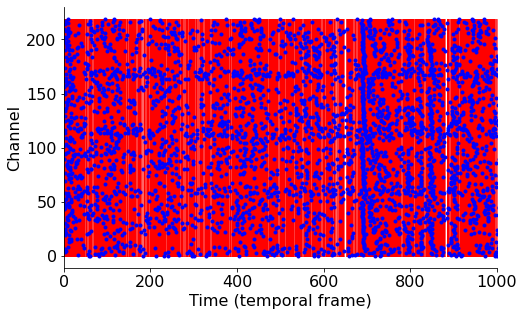

In [129]:
#Have a look at the raster plots and at the detected avalanches, with the selected
#temporal bin 

rep = 0 # recording chosen
n1 = 4051
n2 = 9764 # extremi of the interval in which to look at

RasterPlot(data[rep,n1:n2],avinterval[0])
a = plt.xlim(0,1000)

Calculating best minimal value for power law fit
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered

(14.012599811482312, 1.3053738704355778e-44)
Parameters are (alpha) 1.8664104749454715 xmin 6.0


/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:701: RuntimeWarning: overflow encountered in double_scalars
  )[1:]
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit


(12.295859488292441, 9.533727104479502e-35)
Parameters are (alpha) 2.108263865247113 xmin 12.0


/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:701: RuntimeWarning: overflow encountered in double_scalars
  )[1:]
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit


(-0.34302249071580426, 0.7315815403831754)
Parameters are (alpha) 1.9069411989244025 xmin 46.0


/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:701: RuntimeWarning: overflow encountered in double_scalars
  )[1:]
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(5.944989873217851, 2.7647394748741184e-09)
Parameters are (alpha) 2.136162601770356 xmin 4.0


Calculating best minimal value for power law fit
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:701: RuntimeWarning: overflow encountered in double_scalars
  )[1:]
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(2.945015203345884, 0.0032293879399844863)
Parameters are (alpha) 2.5774346120008778 xmin 9.0


Calculating best minimal value for power law fit
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:701: RuntimeWarning: overflow encountered in double_scalars
  )[1:]


(-0.7427520518969487, 0.45763180954970506)
Parameters are (alpha) 2.8386210663452607 xmin 34.0


/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/benny/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Text(0, 0.5, 'pdf')

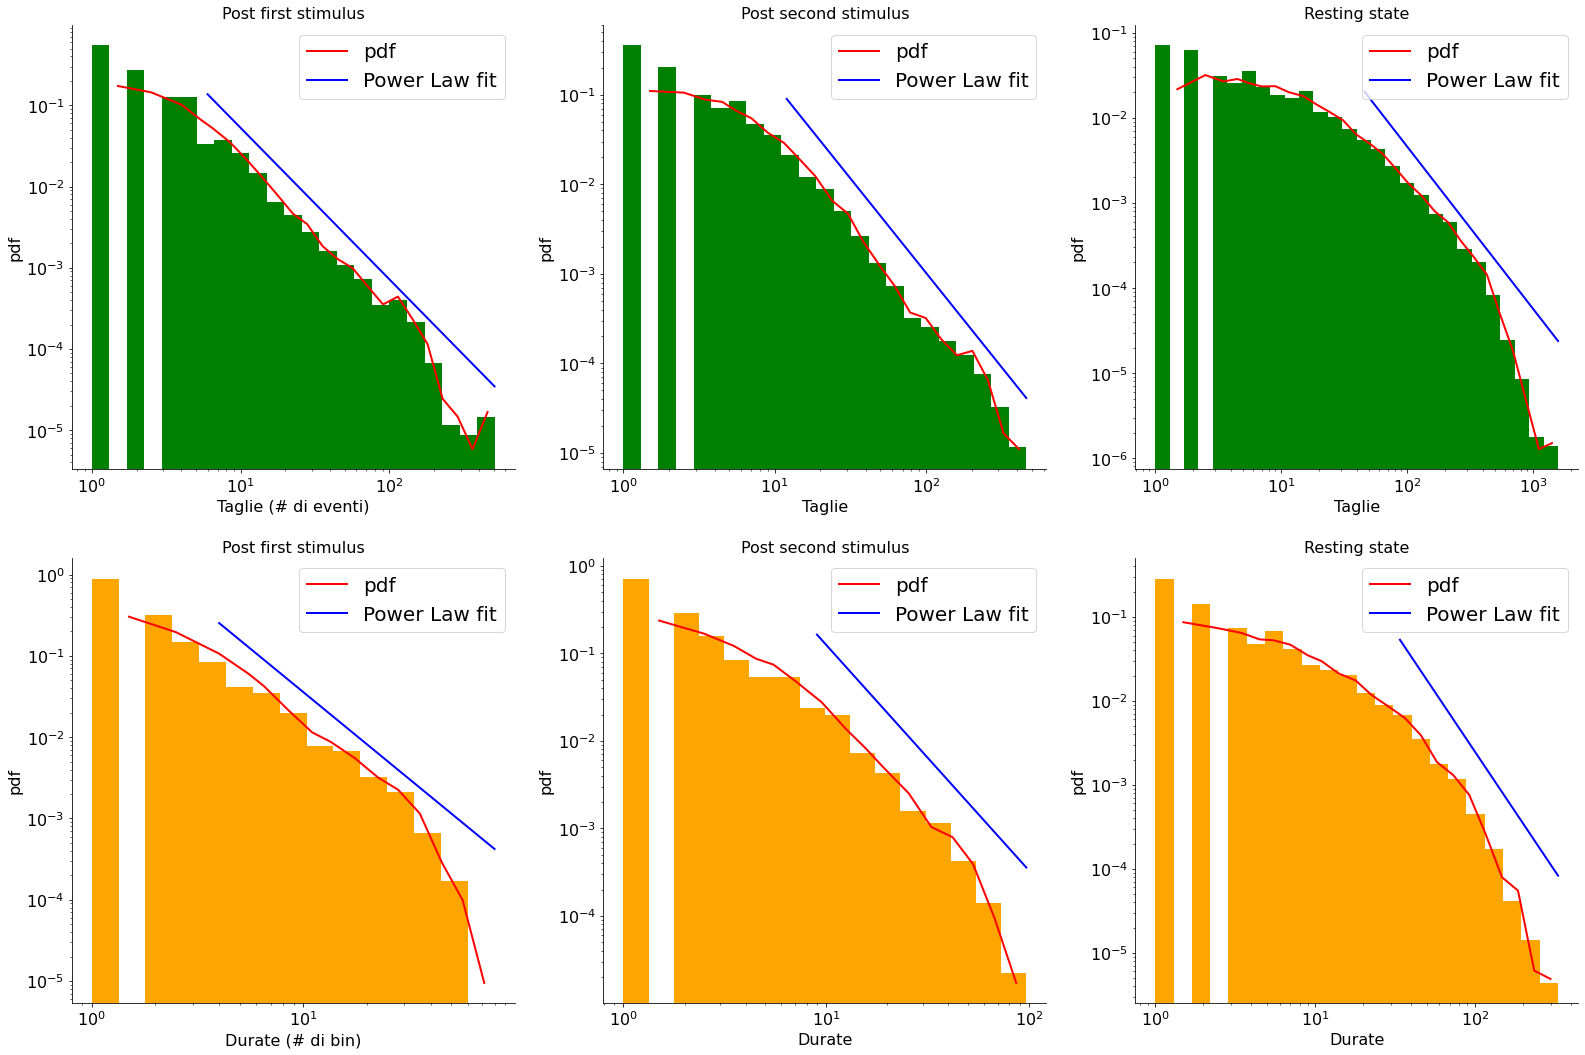

In [128]:
#Plot avalanche sizes and durations ditribution and fit with a chosen model
#Quiroga coef = 3, pos exscursions
fig = plt.figure(figsize = (27,18))

ax1 = fig.add_subplot(2,3,1)
ax1.set_title('Post first stimulus')
i = 0
draw(sizess[i],max(sizess[i]),max(sizess[i]),'power_law',ax1,4, 'green' )
ax1.set_xlabel('Taglie (# di eventi)')
ax1.set_ylabel('pdf')


ax2 = fig.add_subplot(2,3,2)
ax2.set_title('Post second stimulus')
i = 1
draw(sizess[i],max(sizess[i]),max(sizess[i]),'power_law',ax2,4,'green')
ax2.set_xlabel('Taglie')
ax2.set_ylabel('pdf')

ax3 = fig.add_subplot(2,3,3)
ax3.set_title('Resting state')
i = 2
draw(sizess[i],max(sizess[i]),max(sizess[i]),'power_law',ax3,4,'green')
ax3.set_xlabel('Taglie')
ax3.set_ylabel('pdf')

ax4 = fig.add_subplot(2,3,4)
ax4.set_title('Post first stimulus')
i = 0
draw(durationss[i],max(durationss[i]),max(durationss[i]),'power_law',ax4,4, 'orange')
ax4.set_xlabel('Durate (# di bin)')
ax4.set_ylabel('pdf')


ax5 = fig.add_subplot(2,3,5)
ax5.set_title('Post second stimulus')
i = 1
draw(durationss[i],max(durationss[i]),max(durationss[i]),'power_law',ax5,4,'orange')
ax5.set_xlabel('Durate')
ax5.set_ylabel('pdf')

ax6 = fig.add_subplot(2,3,6)
ax6.set_title('Resting state')
i = 2
draw(durationss[i],max(durationss[i]),max(durationss[i]),'power_law',ax6,4,'orange')
ax6.set_xlabel('Durate')
ax6.set_ylabel('pdf')
